In [2]:
import numpy as np
from numpy.random import binomial
from scipy.stats import binom
from math import factorial
import matplotlib.pyplot as plt

## sequences of Bernoulli trials.

$$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$

In [3]:
# Binomial distribution function
def my_binomial(k, n, p):
  return factorial(n)/(factorial(k)*(factorial(n-k)))*pow(p,k)*pow(1-p, n-k)

In [4]:
my_binomial(2, 3, 0.5)

0.375

In [5]:
print('my binomial: {}'.format(my_binomial(2, 3, 0.5)))
dist = binom(3, 0.5)
dist.pmf(2) #Probability mass function

my binomial: 0.375


0.3750000000000001

# Cumulative probability
$$
P(k\leq 2, n=3, p=1/2) = \sum_{k=0}^2 \left[ \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k} \right] = \frac{7}{8}
$$

In [6]:
cumProbability = 0
dist = binom(3, 0.5) #Cumulative distribution function
cumProbability += dist.pmf(0)
cumProbability += dist.pmf(1)
cumProbability += dist.pmf(2)
cumProbability

0.8750000000000002

In [7]:
dist.cdf(2) #Cumulative distribution function

0.875

# Random Sequence Generator (RSG)

In [8]:
import numpy as np
from numpy.random import binomial
import seaborn as sns

In [9]:
p=0.5
n=3
binomial(n, p)

3

In [10]:
arr = np.array([])
for _ in range(100):
  arr = np.append(arr, binomial(n, p))
uniques, frequencies = np.unique(arr, return_counts=True)
uniques, frequencies

(array([0., 1., 2., 3.]), array([16, 31, 41, 12]))

In [11]:
probabilities = frequencies / len(arr)
probabilities

array([0.16, 0.31, 0.41, 0.12])

In [12]:
# Expected values:
[binom(3, 0.5).pmf(k) for k in uniques]

[0.125, 0.3750000000000001, 0.3750000000000001, 0.125]

<AxesSubplot:>

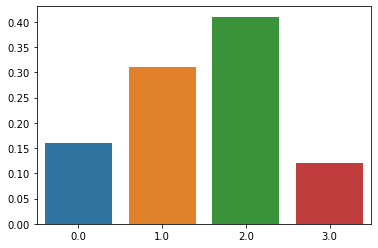

In [13]:
sns.barplot(x = uniques, y = probabilities)

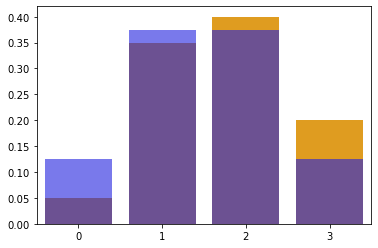

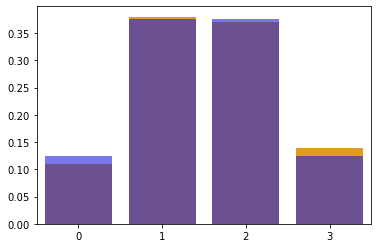

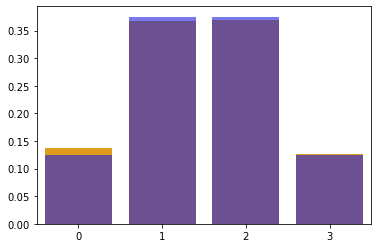

In [23]:
n = 3
p = 0.5

possibleResults = np.array([0, 1, 2, 3])

def plotHist(numTrials):
    arr = np.array([])
    for _ in range(numTrials):
        arr = np.append(arr, binomial(n, p))
    uniques, frequencies = np.unique(arr, return_counts=True)
    probabilities = frequencies / len(arr)
    sns.barplot(x = possibleResults, y = probabilities, color = 'orange', alpha = 1)
    sns.barplot(x = possibleResults, y = [binom(n, p).pmf(k) for k in possibleResults], 
        color = 'blue', alpha = 0.6)
    plt.show()
plotHist(20)
plotHist(100)
plotHist(1000)

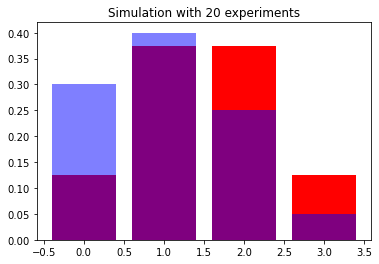

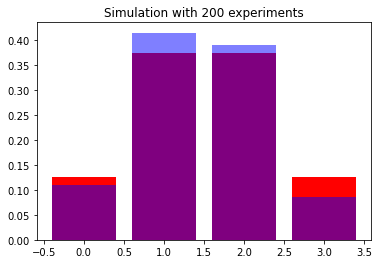

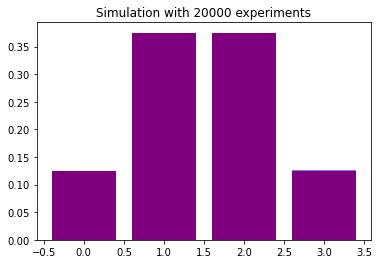

In [19]:
# with pyplot:
def plot_hist(num_trials):
  values = [0,1,2,3]
  arr = []
  for _ in range(num_trials):
    arr.append(binomial(3, 0.5))
  simulated = np.unique(arr, return_counts=True)[1]/len(arr)
  theoretical = [binom(3, 0.5).pmf(k) for k in values]
  plt.bar(values, theoretical, label = 'Theoretical', color = 'red')
  plt.bar(values, simulated, label = 'Simulation', alpha = 0.5, color = 'blue')
  plt.title('Simulation with {} experiments'.format(num_trials))
  plt.show()

plot_hist(20)
plot_hist(200)
plot_hist(20000)